In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns

All files need to be converted from R.data format first. The can be done by opening up R console and issuing the
following commands:

load("/home/sam/Documents/BDS/APM/AppliedPredictiveModeling/data/segmentationOriginal.RData") ('Route dir of .RData File)

write.csv(segmentationOriginal, file = "/home/sam/Documents/BDS/APM/segmentation_original.csv")

In [86]:
seg_org = pd.read_csv('./data/segmentation_original.csv')
seg_org = seg_org.set_index('ID')

In [87]:
train_skews = seg_org[seg_org.Case == 'Train'].skew()

train_skews.head()

Cell              7.934523
AngleCh1         -0.024335
AngleStatusCh1    0.942640
AreaCh1           3.535613
AreaStatusCh1     3.069420
dtype: float64

In [88]:
train = seg_org[seg_org.Case == 'Train']

In [89]:
AreaCh1_boxcox = stats.boxcox(train.AreaCh1)

train.AreaCh1.describe()

count    1009.000000
mean      325.125867
std       216.555276
min       150.000000
25%       194.000000
50%       256.000000
75%       376.000000
max      2186.000000
Name: AreaCh1, dtype: float64

In [90]:
pca = PCA(n_components=10)
pca.fit(seg_org.select_dtypes(include=['float64', 'int']))

#PCA Components
pd.DataFrame(pca.components_).T.head()

for i in range(10):
    print str(i) + ' numerical columns managed to capture: ' +\
    str(sum(pca.explained_variance_ratio_[:i]))[:5] + ' of explained variance'

0 numerical columns managed to capture: 0 of explained variance
1 numerical columns managed to capture: 0.897 of explained variance
2 numerical columns managed to capture: 0.966 of explained variance
3 numerical columns managed to capture: 0.985 of explained variance
4 numerical columns managed to capture: 0.994 of explained variance
5 numerical columns managed to capture: 0.999 of explained variance
6 numerical columns managed to capture: 0.999 of explained variance
7 numerical columns managed to capture: 0.999 of explained variance
8 numerical columns managed to capture: 0.999 of explained variance
9 numerical columns managed to capture: 0.999 of explained variance


Near zero variance is not a problem in Scikit learn, and therefore these variables do not need to be removed.

Firstly, predictors with a unique value or with zero variance are constant and therefore will automatically be eliminated by any good regression software, including Python's scikitlearn. 

Secondly "Near zero," is utterly meaningless, because internally the variables will be standardised and thus all variances become unity (and are all equal). 

In [94]:
#Generate correlation matrix
corr_matrix = seg_org.corr()

corr_matrix.head()

,Cell,AngleCh1,AngleStatusCh1,AreaCh1,AreaStatusCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,AvgIntenCh4,AvgIntenStatusCh1,...,VarIntenCh1,VarIntenCh3,VarIntenCh4,VarIntenStatusCh1,VarIntenStatusCh3,VarIntenStatusCh4,WidthCh1,WidthStatusCh1,XCentroid,YCentroid
Cell,1.000000,0.010620,0.018242,0.052969,0.029672,-0.045462,-0.018517,0.059409,0.119255,-0.035533,...,-0.064540,0.014433,0.104425,-0.090845,-0.055796,-0.036951,0.045832,0.039839,-0.006993,0.155571
AngleCh1,0.010620,1.000000,-0.374190,-0.025281,-0.020864,-0.026470,0.022270,-0.008911,0.006931,-0.026962,...,-0.028852,-0.006622,0.001602,-0.026319,-0.020689,0.046521,-0.053010,0.006096,-0.018739,-0.038105
AngleStatusCh1,0.018242,-0.374190,1.000000,-0.034173,-0.034643,0.031713,0.004107,0.014323,0.001672,0.029539,...,0.043324,0.027412,-0.016660,0.036245,0.073951,0.075618,0.000030,-0.018031,0.021852,0.029010
AreaCh1,0.052969,-0.025281,-0.034173,1.000000,0.766250,-0.039965,-0.163522,-0.139592,-0.084072,-0.016720,...,0.001951,-0.085230,-0.025968,-0.019573,0.013716,0.000057,0.849024,0.176977,-0.017514,-0.048457
AreaStatusCh1,0.029672,-0.020864,-0.034643,0.766250,1.000000,-0.039476,-0.145586,-0.104736,-0.080997,-0.026513,...,-0.009960,-0.081383,-0.050128,-0.029239,-0.002554,0.007300,0.643017,0.243162,-0.015471,-0.019666


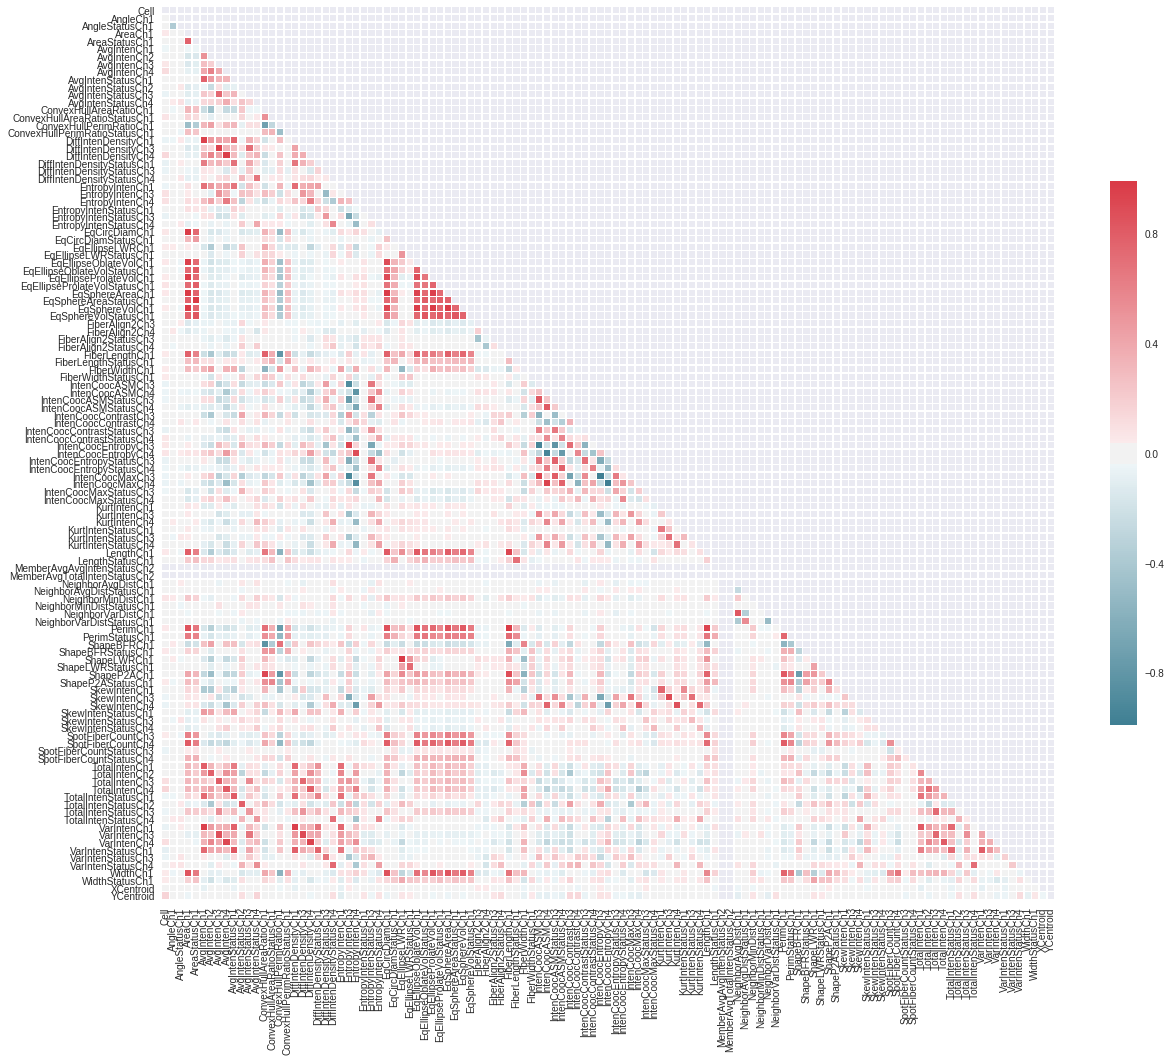

In [131]:
# Compute the correlation matrix
corr = seg_org.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [121]:
c = seg_org.corr().abs()

s = c.unstack().sort_values(ascending= False)

#print top 20 correlations
s[s < 1][:20]

AreaCh1                 EqSphereAreaCh1           0.999999
EqSphereAreaCh1         AreaCh1                   0.999999
IntenCoocEntropyCh3     IntenCoocMaxCh3           0.990003
IntenCoocMaxCh3         IntenCoocEntropyCh3       0.990003
IntenCoocMaxCh4         IntenCoocEntropyCh4       0.985139
IntenCoocEntropyCh4     IntenCoocMaxCh4           0.985139
PerimCh1                FiberLengthCh1            0.984727
FiberLengthCh1          PerimCh1                  0.984727
EqCircDiamCh1           EqSphereAreaCh1           0.979090
EqSphereAreaCh1         EqCircDiamCh1             0.979090
EqCircDiamCh1           AreaCh1                   0.979082
AreaCh1                 EqCircDiamCh1             0.979082
                        EqSphereVolCh1            0.977912
EqSphereVolCh1          AreaCh1                   0.977912
EqSphereAreaCh1         EqSphereVolCh1            0.977908
EqSphereVolCh1          EqSphereAreaCh1           0.977908
                        EqEllipseProlateVolCh1    0.9746

In [126]:
#Example use of Pandas 'Get Dummies' function for categorical variables
pd.get_dummies(seg_org.Class).head()

,PS,WS
ID,,
1,1,0
2,1,0
3,0,1
4,1,0
5,1,0
